In [52]:
import pandas as pd

In [53]:
df = pd.read_csv("../data/store/subset.csv")

In [54]:
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,2,2013-01-01,1,BEAUTY,0.0,0
1,7,2013-01-01,1,CLEANING,0.0,0
2,30,2013-01-01,1,PRODUCE,0.0,0
3,35,2013-01-01,10,BEAUTY,0.0,0
4,40,2013-01-01,10,CLEANING,0.0,0


In [55]:
df = df.sort_values(by=['store_nbr', 'family','date'])

### Data exploration and feature engineering

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

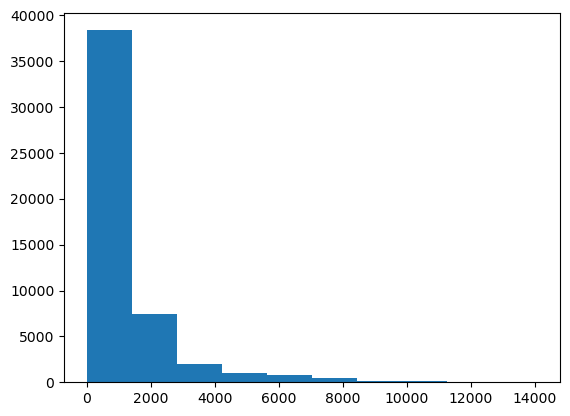

In [57]:
plt.hist(df['sales'])
plt.show()

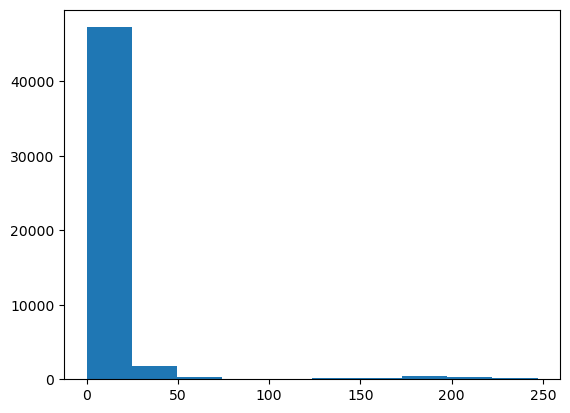

In [58]:
plt.hist(df['onpromotion'])
plt.show()

In [59]:
df['sales_log'] = np.log(df['sales'] + 1)
df['onpromotion_log'] = np.log(df['onpromotion'] + 1)

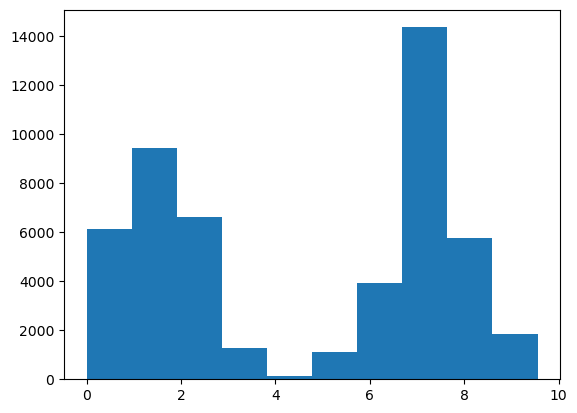

In [60]:
plt.hist(df['sales_log'])
plt.show()

<AxesSubplot:xlabel='store_nbr', ylabel='sales'>

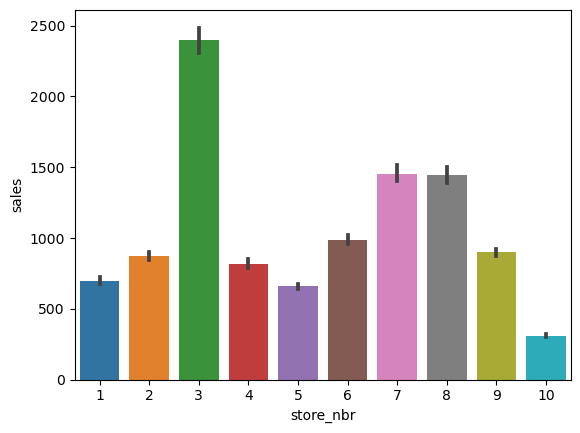

In [61]:
sns.barplot(df, x='store_nbr', y='sales')

<AxesSubplot:xlabel='family', ylabel='sales'>

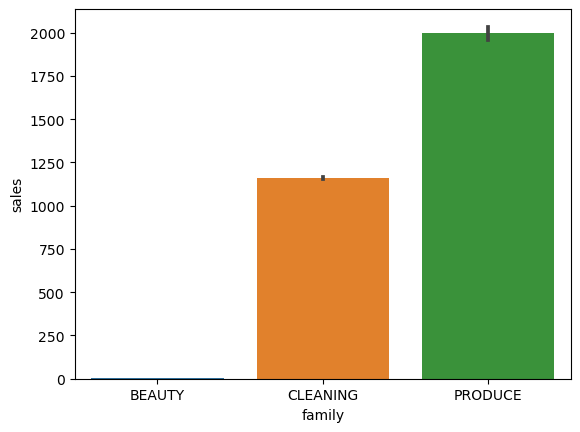

In [62]:
sns.barplot(df, x='family', y='sales')

In [63]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,sales_log,onpromotion_log
0,2,2013-01-01,1,BEAUTY,0.0,0,0.000000,0.0
30,1784,2013-01-02,1,BEAUTY,2.0,0,1.098612,0.0
60,3566,2013-01-03,1,BEAUTY,0.0,0,0.000000,0.0
90,5348,2013-01-04,1,BEAUTY,3.0,0,1.386294,0.0
120,7130,2013-01-05,1,BEAUTY,3.0,0,1.386294,0.0


### Feature engineering on time features

In [64]:
df['date'] = pd.to_datetime(df['date'])

In [65]:
df['month'] = df['date'].dt.month.astype("int8")
# df['day_of_month'] = df['date'].dt.day.astype("int8")
# df['day_of_year'] = df['date'].dt.dayofyear.astype("int16")
df['week_of_month'] = (df['date'].apply(lambda d: (d.day-1) // 7 + 1)).astype("int8")
df['day_of_week'] = (df['date'].dt.dayofweek + 1).astype("int8")
df['year'] = df['date'].dt.year.astype("int32")
df["is_wknd"] = (df['date'].dt.weekday // 4).astype("int8")
df["quarter"] = df['date'].dt.quarter.astype("int8")
df['is_month_start'] = df['date'].dt.is_month_start.astype("int8")
df['is_month_end'] = df['date'].dt.is_month_end.astype("int8")
df['is_quarter_start'] = df['date'].dt.is_quarter_start.astype("int8")
df['is_quarter_end'] = df['date'].dt.is_quarter_end.astype("int8")
df['is_year_start'] = df['date'].dt.is_year_start.astype("int8")
df['is_year_end'] = df['date'].dt.is_year_end.astype("int8")


Out of these new features, we can also hot-encoding month, week_of_month, day_of_week and year 

In [66]:
df = pd.get_dummies(df, columns=['month', 'week_of_month', 'day_of_week', 'year', 'quarter'])

In [67]:
df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'sales_log', 'onpromotion_log', 'is_wknd', 'is_month_start',
       'is_month_end', 'is_quarter_start', 'is_quarter_end', 'is_year_start',
       'is_year_end', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'week_of_month_1', 'week_of_month_2', 'week_of_month_3',
       'week_of_month_4', 'week_of_month_5', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
       'day_of_week_7', 'year_2013', 'year_2014', 'year_2015', 'year_2016',
       'year_2017', 'quarter_1', 'quarter_2', 'quarter_3', 'quarter_4'],
      dtype='object')

### Getting some lag features

if you rememebr ARIMA, a good predictor for future data is past data. We can create similar features to approximate that. 

However, we cannot directly use the shift and lag function; because we have more than 1 time seires. If we use those functions directly, the data from one time series will pollute the next time series!

In [68]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,sales_log,onpromotion_log,is_wknd,is_month_start,...,day_of_week_7,year_2013,year_2014,year_2015,year_2016,year_2017,quarter_1,quarter_2,quarter_3,quarter_4
0,2,2013-01-01,1,BEAUTY,0.0,0,0.000000,0.0,0,1,...,0,1,0,0,0,0,1,0,0,0
30,1784,2013-01-02,1,BEAUTY,2.0,0,1.098612,0.0,0,0,...,0,1,0,0,0,0,1,0,0,0
60,3566,2013-01-03,1,BEAUTY,0.0,0,0.000000,0.0,0,0,...,0,1,0,0,0,0,1,0,0,0
90,5348,2013-01-04,1,BEAUTY,3.0,0,1.386294,0.0,1,0,...,0,1,0,0,0,0,1,0,0,0
120,7130,2013-01-05,1,BEAUTY,3.0,0,1.386294,0.0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [69]:
df['sales_lag'] = df.groupby(['store_nbr', 'family'])['sales_log'].shift().fillna(0)

In [70]:
df = pd.get_dummies(df, columns=['family', 'store_nbr'])

In [71]:
df.columns

Index(['id', 'date', 'sales', 'onpromotion', 'sales_log', 'onpromotion_log',
       'is_wknd', 'is_month_start', 'is_month_end', 'is_quarter_start',
       'is_quarter_end', 'is_year_start', 'is_year_end', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'week_of_month_1',
       'week_of_month_2', 'week_of_month_3', 'week_of_month_4',
       'week_of_month_5', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
       'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017',
       'quarter_1', 'quarter_2', 'quarter_3', 'quarter_4', 'sales_lag',
       'family_BEAUTY', 'family_CLEANING', 'family_PRODUCE', 'store_nbr_1',
       'store_nbr_2', 'store_nbr_3', 'store_nbr_4', 'store_nbr_5',
       'store_nbr_6', 'store_nbr_7', 'store_nbr_8', 'store_nbr_9',
       'store_nbr_10'],
      dtype='object')

In [72]:
df = df.drop(['sales', 'onpromotion', 'id'], axis=1)

In [73]:
# df.to_csv("sales_processed.csv", index=None)

In [74]:
train = df[df['date'] < '2017-01-01']
valid = df[df['date'] >= '2017-01-01']

In [75]:
train = train.drop(['date'], axis=1)
valid = valid.drop(['date'], axis=1)


In [76]:
train.shape

(43710, 56)

### Train linear regression models

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [78]:
y_train = train['sales_log']
X_train = train.drop(['sales_log'], axis=1)


In [79]:
y_valid = valid['sales_log']
X_valid = valid.drop(['sales_log'], axis=1)


In [80]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [81]:
y_pred = model.predict(X_valid)

In [82]:
train_pred = model.predict(X_train)

In [83]:
np.sqrt(mean_squared_error(y_pred, y_valid))

652152453808.6116

In [84]:
np.sqrt(mean_squared_error(train_pred, y_train))

0.6896703521819625

In [85]:
model.coef_

array([ 8.39949520e-02,  2.38841427e+11,  1.82287868e-01,  4.15877918e-02,
       -5.79611840e-02, -1.36805476e-01, -3.88126178e+00, -1.20683214e-01,
        8.00108295e+11,  8.00108295e+11,  8.00108295e+11, -2.51656988e+12,
       -2.51656988e+12, -2.51656988e+12,  1.85716011e+12,  1.85716011e+12,
        1.85716011e+12, -6.09344402e+11, -6.09344402e+11, -6.09344402e+11,
        2.04581490e+10,  2.04581490e+10,  2.04581490e+10,  2.04581490e+10,
        2.04581490e+10,  2.06428748e+11,  2.06428748e+11,  2.06428748e+11,
        2.06428748e+11, -3.24126786e+10, -3.24126786e+10, -3.24126786e+10,
       -6.84275946e+11, -6.84275946e+11, -6.84275946e+11, -6.84275946e+11,
       -3.21234918e+10, -1.03455025e+12,  2.28212792e+12, -2.09160207e+12,
        3.74902445e+11,  9.01489258e-01,  7.12312371e+11,  7.12312371e+11,
        7.12312371e+11, -7.92455544e+11, -7.92455544e+11, -7.92455544e+11,
       -7.92455544e+11, -7.92455544e+11, -7.92455544e+11, -7.92455544e+11,
       -7.92455544e+11, -

### Add regularization

In [86]:
from sklearn.linear_model import Ridge, Lasso

In [87]:
model_1 = Ridge(alpha = 1)
model_1.fit(X_train, y_train)

Ridge(alpha=1)

In [88]:
y_pred = model_1.predict(X_valid)
train_pred = model_1.predict(X_train)
print(np.sqrt(mean_squared_error(y_pred, y_valid)))
print(np.sqrt(mean_squared_error(train_pred, y_train)))

0.6388226602972967
0.6895959227309258


In [89]:
model_1.coef_

array([ 8.35773125e-02,  1.53496818e-01,  1.77414623e-01,  4.82205893e-02,
       -6.36520304e-02, -1.19206871e-01, -3.84665340e+00, -1.43001428e-01,
        1.04311187e-01, -8.59324459e-02, -4.74404091e-03, -3.26004320e-02,
       -2.65826768e-02,  2.33745974e-02,  2.72707245e-02, -4.56062958e-02,
        2.76418095e-02, -1.14588089e-02,  1.20107734e-02,  1.23156084e-02,
        2.61931883e-02, -2.26171719e-02, -9.22972137e-03, -2.29866056e-02,
        2.86403106e-02, -2.13470612e-01,  1.69751006e-02,  9.83783898e-02,
       -5.53796968e-02,  1.02526376e-02,  2.15419155e-01, -7.21749748e-02,
       -7.60363721e-02,  3.10714111e-02,  8.80955464e-03,  3.61554063e-02,
        0.00000000e+00,  1.36347001e-02, -3.58085113e-02,  9.30623824e-03,
        1.28675729e-02,  9.01604991e-01, -2.48923700e-01,  2.14308324e-01,
        3.46153752e-02, -3.38763967e-02,  4.33991189e-03,  7.05948013e-02,
       -3.39790262e-03, -6.33077854e-03,  2.10733787e-02,  2.33099109e-02,
        2.16315295e-02, -

In [90]:
feature_imp = pd.Series(model_1.coef_, index=X_train.columns).sort_values(ascending=False)

In [91]:
feature_imp

sales_lag           0.901605
day_of_week_6       0.215419
family_CLEANING     0.214308
is_month_start      0.177415
is_wknd             0.153497
month_1             0.104311
day_of_week_3       0.098378
onpromotion_log     0.083577
store_nbr_3         0.070595
is_month_end        0.048221
year_2016           0.036155
family_PRODUCE      0.034615
year_2014           0.031071
week_of_month_5     0.028640
month_9             0.027642
month_7             0.027271
week_of_month_1     0.026193
month_6             0.023375
store_nbr_7         0.023310
store_nbr_8         0.021632
store_nbr_6         0.021073
day_of_week_2       0.016975
quarter_1           0.013635
quarter_4           0.012868
month_12            0.012316
month_11            0.012011
day_of_week_5       0.010253
quarter_3           0.009306
year_2015           0.008810
store_nbr_2         0.004340
year_2017           0.000000
store_nbr_4        -0.003398
month_3            -0.004744
store_nbr_5        -0.006331
store_nbr_9   

In [92]:
model_2 = Lasso(alpha = 1)
model_2.fit(X_train, y_train)

Lasso(alpha=1)

In [93]:
y_pred = model_2.predict(X_valid)
train_pred = model_2.predict(X_train)
print(np.sqrt(mean_squared_error(y_pred, y_valid)))
print(np.sqrt(mean_squared_error(train_pred, y_train)))

0.8254923588957883
0.8240235909656473


In [94]:
model_2.coef_

array([ 0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.85830886, -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ])

In [95]:
feature_imp = pd.Series(model_2.coef_, index=X_train.columns).sort_values(ascending=False)

In [96]:
feature_imp

sales_lag           0.858309
onpromotion_log     0.000000
day_of_week_6       0.000000
day_of_week_7       0.000000
year_2013          -0.000000
year_2014           0.000000
year_2015           0.000000
year_2016           0.000000
year_2017           0.000000
quarter_1          -0.000000
quarter_2          -0.000000
quarter_3           0.000000
quarter_4           0.000000
family_BEAUTY      -0.000000
day_of_week_4      -0.000000
family_CLEANING     0.000000
family_PRODUCE      0.000000
store_nbr_1        -0.000000
store_nbr_2         0.000000
store_nbr_3         0.000000
store_nbr_4        -0.000000
store_nbr_5        -0.000000
store_nbr_6         0.000000
store_nbr_7         0.000000
store_nbr_8         0.000000
store_nbr_9        -0.000000
day_of_week_5       0.000000
day_of_week_3       0.000000
is_wknd             0.000000
month_6            -0.000000
is_month_start     -0.000000
is_month_end        0.000000
is_quarter_start   -0.000000
is_quarter_end     -0.000000
is_year_start 

Quiz: Can you find a better lambda value to further improve the performance of the model?

## Train regression models using trees

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
tree_model = RandomForestRegressor()

In [99]:
tree_model.fit(X_train, y_train)

RandomForestRegressor()

In [100]:
y_pred = tree_model.predict(X_valid)
train_pred = tree_model.predict(X_train)
print(np.sqrt(mean_squared_error(y_pred, y_valid)))
print(np.sqrt(mean_squared_error(train_pred, y_train)))

0.4112403591043092
0.16406306516133728


In [101]:
feature_imp = pd.Series(tree_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [102]:
feature_imp

sales_lag           0.947709
is_year_start       0.007295
family_CLEANING     0.003970
is_wknd             0.003501
family_PRODUCE      0.002221
year_2016           0.002179
onpromotion_log     0.001722
year_2014           0.001676
is_month_start      0.001628
store_nbr_10        0.001563
store_nbr_1         0.001390
store_nbr_3         0.001064
day_of_week_7       0.001049
store_nbr_8         0.001005
year_2013           0.000947
month_1             0.000943
day_of_week_2       0.000883
quarter_1           0.000850
family_BEAUTY       0.000838
is_quarter_start    0.000812
day_of_week_6       0.000795
year_2015           0.000791
store_nbr_2         0.000736
week_of_month_1     0.000733
day_of_week_5       0.000724
week_of_month_3     0.000691
day_of_week_1       0.000683
store_nbr_7         0.000675
week_of_month_4     0.000633
day_of_week_4       0.000613
week_of_month_2     0.000608
store_nbr_9         0.000577
month_2             0.000550
month_6             0.000524
store_nbr_6   